In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

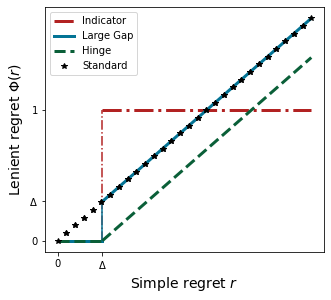

In [2]:
fig = plt.figure(figsize=(5,4.5))
ax = fig.add_subplot(111)

# indicator
ax.plot((0, 0.3), (0, 0), color='firebrick', linestyle='-.', lw=3,label='Indicator')
ax.plot((0.3, 0.3), (0, 1), color='firebrick', linestyle='-.', label='Indicator')
ax.plot((0.3, 1.7), (1, 1), color='firebrick', linestyle='-.', lw=3,label='Indicator')


# large gap
ax.plot((0, 0.3), (0, 0), color='xkcd:sea blue', linestyle='-', lw=3,label='Large Gap')
ax.plot((0.3, 0.3), (0, 0.3), color='xkcd:sea blue', linestyle='-', label='Large Gap')
ax.plot((0.3, 1.7), (0.3, 1.7), color='xkcd:sea blue', linestyle='-', lw=3, label='Large Gap')

# hinge
ax.plot((0, 0.3), (0, 0), color='xkcd:spruce', linestyle='--', lw=3,label='Hinge')
ax.plot((0.3, 1.7), (0, 1.4), color='xkcd:spruce', linestyle='--', lw=3, label='Hinge')

# standard
std_x = np.linspace(0,1.7,30)
std_data = []
for i in range(len(std_x)-1):
    std_data.append((std_x[i], std_x[i+1]))
    std_data.append((std_x[i], std_x[i+1]))
    std_data.append('k*')

ax.plot(*std_data, label='Standard')


ax.set_xticks([0, 0.3])
ax.set_xticklabels([0, r'$\Delta$'])

ax.set_yticks([0, 0.3, 1])
ax.set_yticklabels([0, r'$\Delta$', 1])

ax.set_xlabel(r'Simple regret $r$', fontsize=14)
ax.set_ylabel(r'Lenient regret $\Phi(r)$', fontsize=14)


handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()
# fig.savefig('gap_functions.pdf', bbox_inches='tight')

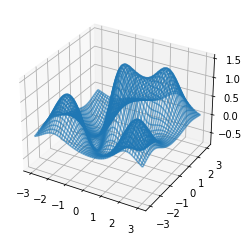

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from functions import Syn_1

syn1 = Syn_1()
meshgrid = np.array(np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200)), np.float64)
syn1_y = syn1(meshgrid.reshape(2,-1).T).reshape(200,200)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(meshgrid[0], meshgrid[1], syn1_y, alpha=0.6)
plt.show()

In [4]:
MAXSTEP = 700
N_INITS = 2

def plot_lenient(ucb_regrets, elim_regrets):
    fig, ax1 = plt.subplots(figsize=(5,4), sharex=True)

    ucb_standard_mean = np.mean(ucb_regrets[0], axis=0)
    ucb_standard_std = np.std(ucb_regrets[0], axis=0)

    ucb_indicator_mean = np.mean(ucb_regrets[1], axis=0)
    ucb_indicator_std = np.std(ucb_regrets[1], axis=0)

    ucb_gap_mean = np.mean(ucb_regrets[2], axis=0)
    ucb_gap_std = np.std(ucb_regrets[2], axis=0)

    ucb_hinge_mean = np.mean(ucb_regrets[3], axis=0)
    ucb_hinge_std = np.std(ucb_regrets[3], axis=0)


    elim_standard_mean = np.mean(elim_regrets[0], axis=0)
    elim_standard_std = np.std(elim_regrets[0], axis=0)

    elim_indicator_mean = np.mean(elim_regrets[1], axis=0)
    elim_indicator_std = np.std(elim_regrets[1], axis=0)

    elim_gap_mean = np.mean(elim_regrets[2], axis=0)
    elim_gap_std = np.std(elim_regrets[2], axis=0)

    elim_hinge_mean = np.mean(elim_regrets[3], axis=0)
    elim_hinge_std = np.std(elim_regrets[3], axis=0)

    rlen = np.arange(MAXSTEP-N_INITS)
    x_array = np.arange(N_INITS+1, MAXSTEP+1, 50)
    x_array = [0, 100, 200, 300, 400, 500, 600, 690 ]
    
    ax1.plot(rlen, ucb_standard_mean[rlen], color='k', linestyle='-', lw=2)
    ax1.plot(rlen, ucb_indicator_mean[rlen], color='firebrick', linestyle='-', lw=2)
    ax1.plot(rlen, ucb_gap_mean[rlen], color='xkcd:sea blue', linestyle='-', lw=2)
    ax1.plot(rlen, ucb_hinge_mean[rlen], color='xkcd:spruce', linestyle='-', lw=2)

    ax1.plot(rlen, elim_standard_mean[rlen], color='k', linestyle='--', lw=2)
    ax1.plot(rlen, elim_indicator_mean[rlen], color='firebrick', linestyle='--', lw=2)
    ax1.plot(rlen, elim_gap_mean[rlen], color='xkcd:sea blue', linestyle='--', lw=2)
    ax1.plot(rlen, elim_hinge_mean[rlen], color='xkcd:spruce', linestyle='--', lw=2)


    ax1.errorbar(x_array, ucb_standard_mean[x_array], ucb_standard_std[x_array],
                color='k', fmt='>', linestyle=' ',\
                markersize='9', capsize=2, lw=2)
    ax1.errorbar(x_array, ucb_indicator_mean[x_array], ucb_indicator_std[x_array],
                color='firebrick', fmt='^', linestyle=' ',\
                markersize='9', capsize=2, lw=2)
    ax1.errorbar(x_array, ucb_gap_mean[x_array], ucb_gap_std[x_array],
                color='xkcd:sea blue', fmt='h', linestyle=' ',\
                markersize='8', capsize=2, lw=2)
    ax1.errorbar(x_array, ucb_hinge_mean[x_array], ucb_hinge_std[x_array],
                color='xkcd:spruce', fmt='s', linestyle=' ',\
                markersize='8', capsize=2, lw=2)

    ax1.errorbar(x_array[0], ucb_standard_mean[x_array][0], ucb_standard_std[x_array][0],
                color='k', fmt='>', linestyle='-',\
                markersize='9', capsize=2, lw=2, label='UCB Standard')
    ax1.errorbar(x_array[0], ucb_indicator_mean[x_array][0], ucb_indicator_std[x_array][0],
                color='firebrick', fmt='^', linestyle='-',\
                markersize='9', capsize=2, lw=2, label='UCB Indicator')
    ax1.errorbar(x_array[0], ucb_gap_mean[x_array][0], ucb_gap_std[x_array][0],
                color='xkcd:sea blue', fmt='h', linestyle='-',\
                markersize='8', capsize=2, lw=2, label='UCB Large Gap')
    ax1.errorbar(x_array[0], ucb_hinge_mean[x_array][0], ucb_hinge_std[x_array][0],
                color='xkcd:spruce', fmt='s', linestyle='-',\
                markersize='8', capsize=2, lw=2, label='UCB Hinge')

    ax1.errorbar(x_array, elim_standard_mean[x_array], elim_standard_std[x_array],
                color='k', fmt='>', linestyle=' ',\
                markersize='9', capsize=2, lw=2)
    ax1.errorbar(x_array, elim_indicator_mean[x_array], elim_indicator_std[x_array],
                color='firebrick', fmt='^', linestyle=' ',\
                markersize='9', capsize=2, lw=2)
    ax1.errorbar(x_array, elim_gap_mean[x_array], elim_gap_std[x_array],
                color='xkcd:sea blue', fmt='h', linestyle=' ',\
                markersize='8', capsize=2, lw=2)
    ax1.errorbar(x_array, elim_hinge_mean[x_array], elim_hinge_std[x_array],
                color='xkcd:spruce', fmt='s', linestyle=' ',\
                markersize='8', capsize=2, lw=2)
    
    
    ax1.errorbar(x_array[0], elim_standard_mean[x_array][0], elim_standard_std[x_array][0],
                color='k', fmt='>', linestyle=':',\
                markersize='9', capsize=2, lw=2, label='Elim Standard')
    ax1.errorbar(x_array[0], elim_indicator_mean[x_array][0], elim_indicator_std[x_array][0],
                color='firebrick', fmt='^', linestyle=':',\
                markersize='9', capsize=2, lw=2, label='Elim Indicator')
    ax1.errorbar(x_array[0], elim_gap_mean[x_array][0], elim_gap_std[x_array][0],
                color='xkcd:sea blue', fmt='h', linestyle=':',\
                markersize='8', capsize=2, lw=2, label='Elim Large Gap')
    ax1.errorbar(x_array[0], elim_hinge_mean[x_array][0], elim_hinge_std[x_array][0],
                color='xkcd:spruce', fmt='s', linestyle=':',\
                markersize='8', capsize=2, lw=2, label='Elim Hinge')

    ax1.set_xlabel('Queries', fontsize=14)
    ax1.set_ylabel('Cumulative Regret', fontsize=14)

    ax1.legend(loc='upper left', fontsize='small')

    plt.show()
    # fig.savefig('lenient_ucb_elim.pdf', bbox_inches='tight')

In [5]:
syn1_regrets = np.load('./syn1_lenient.npy', allow_pickle=True)[()]
syn1_regrets_ucb = syn1_regrets['ucb']
syn1_regrets_elim = syn1_regrets['elim']

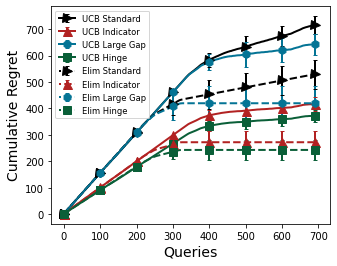

In [6]:
plot_lenient(syn1_regrets_ucb, syn1_regrets_elim)